In [85]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/child-mind-institute-detect-sleep-states/train_series.parquet
/kaggle/input/child-mind-institute-detect-sleep-states/sample_submission.csv
/kaggle/input/child-mind-institute-detect-sleep-states/train_events.csv
/kaggle/input/child-mind-institute-detect-sleep-states/test_series.parquet
/kaggle/input/score-obtained-with-different-train-models/test_scores_ensemble_scm_v4.csv
/kaggle/input/score-obtained-with-different-train-models/test_scores_ensemble_scm_v4_changing_logic.csv
/kaggle/input/score-obtained-with-different-train-models/valid_scores_xgboost_scm_v4.csv
/kaggle/input/score-obtained-with-different-train-models/valid_scores_random_forest_scm_v4.csv
/kaggle/input/score-obtained-with-different-train-models/valid_scores_cnn_scm_v4.csv
/kaggle/input/score-obtained-with-different-train-models/valid_scores_catboost_scm_v4.csv
/kaggle/input/score-obtained-with-different-train-models/test_scores_catboost_scm_v4.csv
/kaggle/input/score-obtained-with-different-train-models/te

In [86]:
test_lgb=pd.read_csv('/kaggle/input/score-obtained-with-different-train-models/test_scores_LGB_scm_v4.csv') 
test_lgb['model']='Lgb'
test_lgb['set']='test'

test_catboost=pd.read_csv('/kaggle/input/score-obtained-with-different-train-models/test_scores_catboost_scm_v4.csv') 
test_catboost['model']='Catboost'
test_catboost['set']='test'

test_rcnn=pd.read_csv('/kaggle/input/score-obtained-with-different-train-models/test_scores_cnn_scm_v4.csv') 
test_rcnn['model']='R-CNN'
test_rcnn['set']='test'

test_ensemble=pd.read_csv('/kaggle/input/score-obtained-with-different-train-models/test_scores_ensemble_scm_v4.csv') 
test_ensemble['model']='Ensemble'
test_ensemble['set']='test'

test_heuristic=pd.read_csv('/kaggle/input/score-obtained-with-different-train-models/test_scores_heuristic_approach.csv') 
test_heuristic['model']='Heuristic'
test_heuristic['set']='test'

test_randomforest=pd.read_csv('/kaggle/input/score-obtained-with-different-train-models/test_scores_random_forest_scm_v4.csv') 
test_randomforest['model']='Random_forest'
test_randomforest['set']='test'

test_xgboost=pd.read_csv('/kaggle/input/score-obtained-with-different-train-models/test_scores_xgboost_scm_v4.csv') 
test_xgboost['model']='Xgboost'
test_xgboost['set']='test'

valid_lgb=pd.read_csv('/kaggle/input/score-obtained-with-different-train-models/valid_scores_LGB_scm_v4.csv') 
valid_lgb['model']='Lgb'
valid_lgb['set']='valid'

valid_catboost=pd.read_csv('/kaggle/input/score-obtained-with-different-train-models/valid_scores_catboost_scm_v4.csv') 
valid_catboost['model']='Catboost'
valid_catboost['set']='valid'

valid_rcnn=pd.read_csv('/kaggle/input/score-obtained-with-different-train-models/valid_scores_cnn_scm_v4.csv') 
valid_rcnn['model']='R-CNN'
valid_rcnn['set']='valid'

valid_ensemble=pd.read_csv('/kaggle/input/score-obtained-with-different-train-models/validation_scores_ensemble_scm_v4.csv') 
valid_ensemble['model']='Ensemble'
valid_ensemble['set']='valid'

valid_heuristic=pd.read_csv('/kaggle/input/score-obtained-with-different-train-models/valid_scores_heuristic_approach.csv') 
valid_heuristic['model']='Heuristic'
valid_heuristic['set']='valid'

valid_randomforest=pd.read_csv('/kaggle/input/score-obtained-with-different-train-models/valid_scores_random_forest_scm_v4.csv') 
valid_randomforest['model']='Random_forest'
valid_randomforest['set']='valid'

valid_xgboost=pd.read_csv('/kaggle/input/score-obtained-with-different-train-models/valid_scores_xgboost_scm_v4.csv') 
valid_xgboost['model']='Xgboost'
valid_xgboost['set']='valid'

results=pd.concat([test_lgb, test_catboost,test_rcnn,test_ensemble,
                   test_heuristic,test_randomforest,test_xgboost,
                   valid_lgb,valid_catboost,valid_rcnn,valid_ensemble,
                   valid_heuristic,valid_randomforest,valid_xgboost])

results.groupby('Series_Id').size()

Series_Id
062cae666e2a    7
062dbd4c95e6    7
08db4255286f    7
0cd1e3d0ed95    7
137b99e936ab    7
               ..
f0482490923c    7
f56824b503a0    7
fb223ed2278c    7
fcca183903b7    7
fe90110788d2    7
Length: 68, dtype: int64

In [87]:
results.head()

,Series_Id,Score,model,set
0,062cae666e2a,0.166667,Lgb,test
1,694faf956ebf,0.664853,Lgb,test
2,18a0ca03431d,0.632847,Lgb,test
3,8becc76ea607,0.038462,Lgb,test
4,2fbbee1a38e3,0.010119,Lgb,test


In [88]:
results.groupby(['model','set'])['Score'].mean()

model          set  
Catboost       test     0.612204
               valid    0.606714
Ensemble       test     0.599533
               valid    0.603584
Heuristic      test     0.239061
               valid    0.221483
Lgb            test     0.221169
               valid    0.331096
R-CNN          test     0.650176
               valid    0.678549
Random_forest  test     0.560723
               valid    0.561920
Xgboost        test     0.600482
               valid    0.610334
Name: Score, dtype: float64

/tmp/ipykernel_47/3761291380.py:11: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  ax = sns.displot(results_f,x="Score",hue="model",kind='kde', fill=True,


<Figure size 400x400 with 0 Axes>

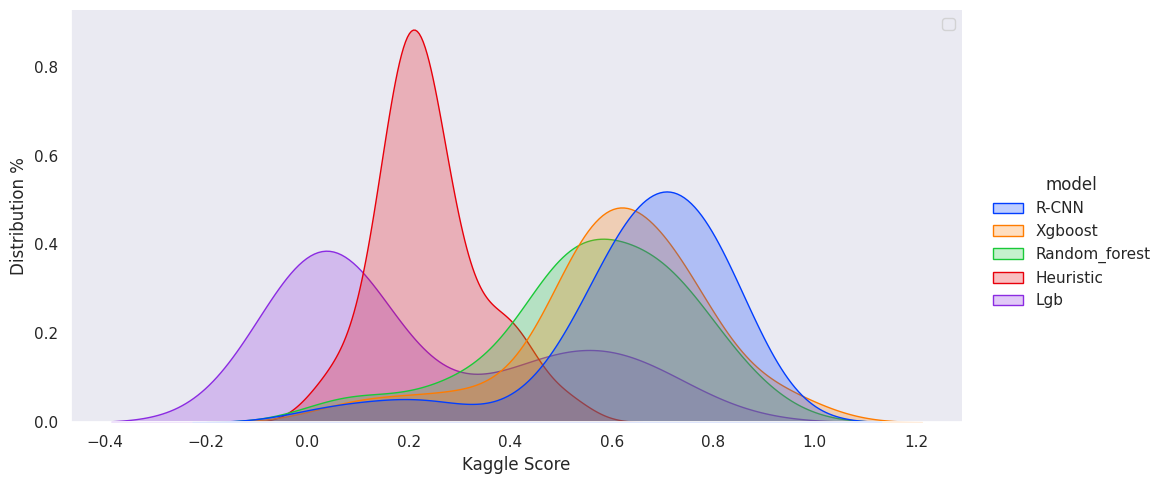

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(style='dark')

results_f=results[((results['model']=='Lgb') | (results['model']=='Heuristic') | (results['model']=='Xgboost') | (results['model']=='Random_forest') | (results['model']=='R-CNN'))]
#results_f=results
results_f=results_f[(results_f['set']=='test')]

fig = plt. figure(figsize=(4,4))
#ax = sns.displot(results_f,x="Score",hue="model",alpha = 0.5) # ,palette=["#9b59b6", "#F2A5A5"]
ax = sns.displot(results_f,x="Score",hue="model",kind='kde', fill=True,
                 palette=sns.color_palette('bright')[:7], height=5, aspect=2,
                hue_order=['R-CNN','Xgboost','Random_forest','Heuristic','Lgb'])
#ax.bar_label(ax.containers[0], fmt='%.0f',color="#84B29E",fontweight='bold')
#ax.bar_label(ax.containers[1], fmt='%.0f',color="#122740",fontweight='bold')
#ax.bar_label(ax.containers[0], fmt='%.0f',color="#9b59b6",fontweight='bold')
#ax.bar_label(ax.containers[1], fmt='%.0f',color="#F2A5A5",fontweight='bold')
plt.xlabel("Kaggle Score", fontsize=12)
plt.ylabel("Distribution %", fontsize=12)
plt.legend(loc='upper right')
plt.show()


In [90]:
results.groupby('set').size()

set
test     238
valid    238
dtype: int64

In [91]:
results.groupby('model').size()

model
Catboost         68
Ensemble         68
Heuristic        68
Lgb              68
R-CNN            68
Random_forest    68
Xgboost          68
dtype: int64

In [92]:
results_pivot=results.pivot_table('Score',['Series_Id', 'set'],'model').reset_index()

In [93]:
results_pivot.groupby('set').size()

set
test     34
valid    34
dtype: int64

In [94]:
results_pivot.columns

Index(['Series_Id', 'set', 'Catboost', 'Ensemble', 'Heuristic', 'Lgb', 'R-CNN',
       'Random_forest', 'Xgboost'],
      dtype='object', name='model')

In [95]:
results_pivot[['Series_Id','set','Heuristic','Lgb','Catboost','Random_forest','Xgboost','R-CNN']].head(20)

model,Series_Id,set,Heuristic,Lgb,Catboost,Random_forest,Xgboost,R-CNN
0,062cae666e2a,test,0.252222,0.166667,0.616667,0.083333,0.166667,0.525694
1,062dbd4c95e6,valid,0.170149,0.508812,0.460419,0.440882,0.472298,0.498661
2,08db4255286f,valid,0.310720,0.023608,0.603150,0.584653,0.564202,0.715559
3,0cd1e3d0ed95,test,0.425000,0.066667,0.754861,0.648333,0.756647,0.805357
4,137b99e936ab,test,0.206392,0.376868,0.277675,0.299457,0.274882,0.583448
5,1762ab70ec76,valid,0.327978,0.491733,0.549984,0.484430,0.548103,0.591001
6,18a0ca03431d,test,0.217586,0.632847,0.619593,0.689181,0.648897,0.753983
7,18b61dd5aae8,test,0.204162,0.508540,0.644942,0.514658,0.638055,0.751398
8,1955d568d987,test,0.206034,0.754831,0.702677,0.749626,0.758537,0.768076
9,25e2b3dd9c3b,valid,0.127489,0.668314,0.689073,0.652420,0.707786,0.819967


In [96]:
results_pivot_test=results_pivot[(results_pivot['set']=='test')]
results_pivot_test

model,Series_Id,set,Catboost,Ensemble,Heuristic,Lgb,R-CNN,Random_forest,Xgboost
0,062cae666e2a,test,0.616667,0.191667,0.252222,0.166667,0.525694,0.083333,0.166667
3,0cd1e3d0ed95,test,0.754861,0.761111,0.425000,0.066667,0.805357,0.648333,0.756647
4,137b99e936ab,test,0.277675,0.295217,0.206392,0.376868,0.583448,0.299457,0.274882
6,18a0ca03431d,test,0.619593,0.669733,0.217586,0.632847,0.753983,0.689181,0.648897
7,18b61dd5aae8,test,0.644942,0.635661,0.204162,0.508540,0.751398,0.514658,0.638055
8,1955d568d987,test,0.702677,0.763750,0.206034,0.754831,0.768076,0.749626,0.758537
10,2b8d87addea9,test,0.534513,0.589158,0.196588,0.609746,0.675660,0.527437,0.593238
12,2fbbee1a38e3,test,0.794484,0.795511,0.369501,0.010119,0.800827,0.778698,0.810172
15,3be2f86c3e45,test,0.903125,0.871875,0.415625,0.000000,0.609952,0.853125,0.937500
16,3c336d6ba566,test,0.709689,0.705498,0.284135,0.038462,0.855910,0.640316,0.719349


In [97]:
results_pivot_test.set_index("Series_Id", inplace = True)

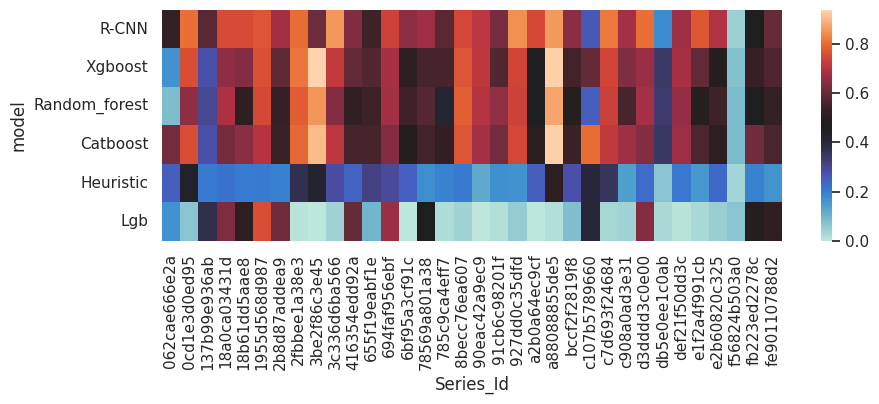

In [123]:
fig = plt.figure(figsize=(10,3))
#cmap = "tab20"
hm = sns.heatmap(data = results_pivot_test[['Lgb','Heuristic','Catboost','Random_forest','Xgboost','R-CNN']].T,
                 #cmap=cmap
                xticklabels=True, yticklabels=True,
                cmap="icefire"#"rocket_r"
                )  
# displaying the plotted heatmap 
hm.invert_yaxis()
plt.show()

In [124]:
leaderboard = pd.read_csv('/kaggle/input/competition-leaderboard-21112023/child-mind-institute-detect-sleep-states-publicleaderboard-2023-11-22T04_13_04.csv')

In [125]:
leaderboard

,Rank,TeamId,TeamName,LastSubmissionDate,Score,SubmissionCount,TeamMemberUserNames
0,1,11008610,K_mat,2023-11-19 11:29:11,0.797,17,kmat2019
1,2,11087627,Chris Deotte,2023-11-21 22:37:01,0.784,83,cdeotte
2,3,10873322,Ruby,2023-11-20 16:21:07,0.778,16,w5833946
3,4,10985932,[Rist]Takoi,2023-11-21 12:22:43,0.776,113,takoihiraokazu
4,5,10872957,Quants and poets,2023-11-21 22:17:47,0.776,125,"kyakovlev,trasibulo"
...,...,...,...,...,...,...,...
1663,1663,10876529,DrCapa,2023-11-02 09:26:51,0.000,1,drcapa
1664,1664,11169828,Maadness,2023-11-06 04:51:35,0.000,4,maadness
1665,1665,10948631,Jonas Hodel,2023-11-07 19:56:46,0.000,3,jonashodel
1666,1666,11152136,Yury Y,2023-11-13 18:05:27,0.000,4,sciyy1


<Figure size 800x400 with 0 Axes>

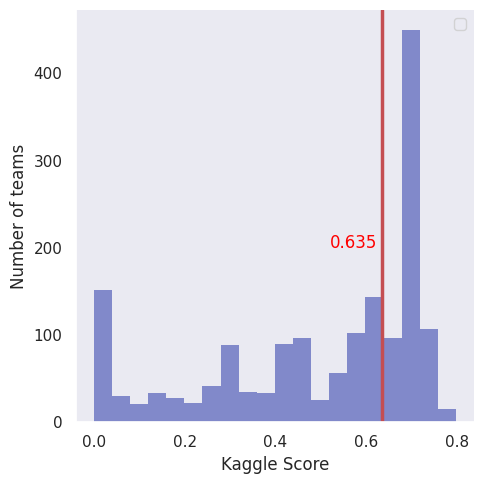

In [138]:
fig = plt.figure(figsize=(8,4))
ax = sns.displot(leaderboard,x="Score",alpha = .6,color="#3C48B0",bins=20, linewidth = 0)
#ax.axvline(x=0.635, color='r', linewidth=4.5)
#ax.bar_label(ax.containers[1], fmt='%.0f',color="#F2A5A5",fontweight='bold')
plt.ylabel("Number of teams", fontsize=12)
plt.xlabel("Kaggle Score", fontsize=12)
plt.legend(loc='upper right')
plt.axvline(0.635, color='r', linewidth=2.5)
plt.text(0.52,200,'0.635',color='red',fontsize=12)
plt.show()